In [59]:

from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import numpy as np

In [60]:
from sklearn.datasets import load_iris 
SEED=2017


In [61]:
iris = load_iris()
idxs = np.where(iris.target < 2)
X = iris.data[idxs]
y = iris.target[idxs]


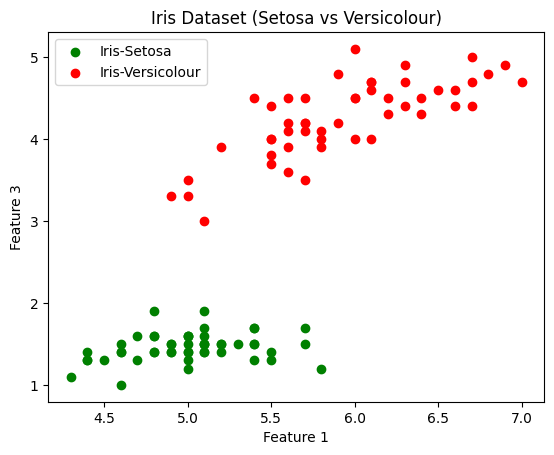

In [62]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 2], color='green', label='Iris-Setosa')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 2], color='red', label='Iris-Versicolour')
plt.xlabel('Feature 1')
plt.ylabel('Feature 3')
plt.legend()
plt.title('Iris Dataset (Setosa vs Versicolour)')
plt.show()

In [63]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [64]:
weights = np.random.normal(size=X_train.shape[1])
bias = 1

In [65]:
learning_rate = 0.1
n_epochs = 15

In [66]:
hist_loss = []
hist_accuracy = []

# Training the perceptron
for i in range(n_epochs):
    # Perceptron output (0 or 1)
    output = np.where((X_train.dot(weights) + bias) > 0.5, 1, 0)
    
    # Compute Mean Squared Error (MSE)
    error = np.mean((y_train - output) ** 2)
    print(f"Epoch {i+1}/{n_epochs}")
    print("Error:", error)
    
    # Update weights and bias
    weights -= learning_rate * np.dot((output - y_train), X_train)
    bias += learning_rate * np.sum(output - y_train)
    
    print("Weights:", weights)
    print("Bias:", bias)
    
    # Calculate loss and validation accuracy
    loss = np.mean((output - y_train) ** 2)
    hist_loss.append(loss)
    
    output_val = np.where(X_val.dot(weights) + bias > 0.5, 1, 0)
    accuracy = np.mean(np.where(y_val == output_val, 1, 0))
    hist_accuracy.append(accuracy)




Epoch 1/15
Error: 0.9875
Weights: [ 3.90594238 -1.08450776  9.86702626  4.58665342]
Bias: 0.9
Epoch 2/15
Error: 0.5
Weights: [-16.04405762 -14.70450776   4.03702626   3.59665342]
Bias: 4.9
Epoch 3/15
Error: 0.5
Weights: [ 7.71594238 -3.57450776 20.98702626  8.93665342]
Bias: 0.9000000000000004
Epoch 4/15
Error: 0.5
Weights: [-12.23405762 -17.19450776  15.15702626   7.94665342]
Bias: 4.9
Epoch 5/15
Error: 0.5
Weights: [11.52594238 -6.06450776 32.10702626 13.28665342]
Bias: 0.9000000000000004
Epoch 6/15
Error: 0.5
Weights: [ -8.42405762 -19.68450776  26.27702626  12.29665342]
Bias: 4.9
Epoch 7/15
Error: 0.0
Weights: [ -8.42405762 -19.68450776  26.27702626  12.29665342]
Bias: 4.9
Epoch 8/15
Error: 0.0
Weights: [ -8.42405762 -19.68450776  26.27702626  12.29665342]
Bias: 4.9
Epoch 9/15
Error: 0.0
Weights: [ -8.42405762 -19.68450776  26.27702626  12.29665342]
Bias: 4.9
Epoch 10/15
Error: 0.0
Weights: [ -8.42405762 -19.68450776  26.27702626  12.29665342]
Bias: 4.9
Epoch 11/15
Error: 0.0
Weigh

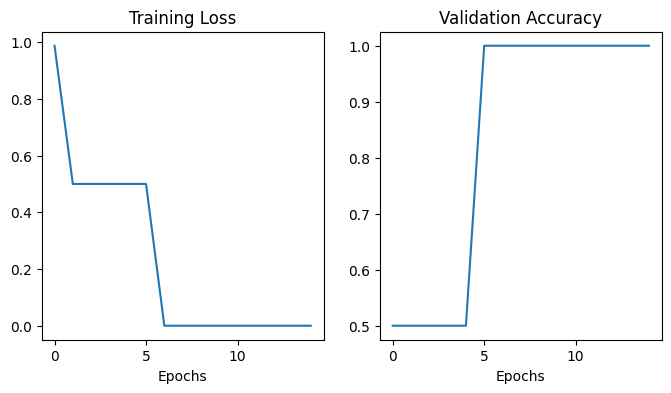

In [70]:
# Plot training loss and validation accuracy
fig = plt.figure(figsize=(8, 4))

# Plot training loss
a = fig.add_subplot(1, 2, 1)
plt.plot(hist_loss)
plt.xlabel('Epochs')
a.set_title('Training Loss')

# Plot validation accuracy
a = fig.add_subplot(1, 2, 2)
plt.plot(hist_accuracy)
plt.xlabel('Epochs')
a.set_title('Validation Accuracy')

plt.show()